# <center> **Análisis de Patrones Delictivos y Estrategias de Seguridad utilizando Machine Learning**

# **Integrantes:**

* Walter Manuel Marañon Quiñones
* Patricia Mollericona Bautista
* Jorge Reynaldo Vallejos Escobar

# **Contenido**



1.   [Introducción](#Introducción)
2.   [Descripción del problema](#Descripción_del_problema)
3.   [Objetivos](#Objetivos)
4.   [Libreias y Dataset](#Libreias_y_Dataset)
5.   [Limpieza de los datos](#Limpieza_de_los_datos)
6.   [Analisis de los datos](#Analisis_de_los_datos)
7.   [Modelo de Prediccion de crimeres](#Modelo_de_Prediccion_de_crimeres)
8.   [Modelo de detección de anomalías](#Modelo_de_detección_de_anomalías)
9.   [Modelo identificación de hotspots de crimen](#Modelo_identificación_de_hotspots_de_crimen)
10.   [Modelo análisis de relaciones entre factores demográficos y criminalidad](#Modelo_análisis_de_relaciones_entre_factores_demográficos_y_criminalidad)
11.   [Resultados](#Resultados)
12.   [Conclusiones](#Conclusiones)

# **Introducción**

El presente proyecto contiene información detallada sobre incidentes criminales reportados desde el año 2020 en adelante, proporcionando un registro detallado sobre cada evento. Las características que tiene el conjunto de datos incluyen fechas, horarios, ubicaciones, características de los delitos y datos demográficos de las víctimas. El dataset brinda información para la identificación de patrones delictivos, análisis de incidencia en diferentes áreas y demografías, así como la facilitación de la distribución de políticas y estrategias de seguridad pública basadas en datos. Esta información puede ser usada tanto para propósitos operativos (intervención policial) como estratégicos (prevención y educación).

# **Descripción del problema**

La policía y las autoridades locales enfrentan desafíos constantes en su lucha contra la delincuencia, un fenómeno complejo que varía significativamente según las características sociales, económicas y geográficas de cada comunidad. Los incidentes delictivos no solo generan un impacto directo en la calidad de vida de las personas, sino que afectan de manera desproporcionada a ciertos barrios y grupos vulnerables, intensificando la percepción de inseguridad y dificultando la cohesión social.

El proyecto tiene como propósito abordar varios aspectos críticos:
* Identificación de patrones temporales y geográficos.
* Clasificación de tipos de crimen y factores asociados.
* Detección de anomalías en patrones delictivos.
* Planificación de estrategias de seguridad pública.


# **Objetivos**

## **Objetivo General**

Desarrollar diversos modelos de Machine Learning para obtener información de patrones delictivos y otros factores asociados a los crímenes registrados en el dataset



## **Objetivos Específicos**

* Identificar zonas/áreas de alta incidencia delictiva mediante el análisis geográfico de los datos de ubicación y características de cada incidente.
* Determinar patrones temporales de los crímenes reportados.
* Analizar el perfil demográfico de las víctimas con el fin de entender qué grupos poblacionales son más vulnerables a ciertos tipos de crímenes.
* Evaluar la efectividad de la respuesta y resolución de casos, mediante el análisis del estado de cada caso, desde el reporte hasta su resolución.
* Desarrollar modelos predictivos utilizando técnicas de machine learning para anticipar la ocurrencia de delitos en ciertas áreas y horas.
* Generar gráficos (como mapas de calor y gráficos interactivos) que faciliten la interpretación de los datos y apoyen la toma de decisiones.



---


# **Libreias y Dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from folium.plugins import FastMarkerCluster, MarkerCluster

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer



In [ ]:
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984045 entries, 0 to 984044
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           984045 non-null  int64  
 1   Date Rptd       984045 non-null  object 
 2   DATE OCC        984045 non-null  object 
 3   TIME OCC        984045 non-null  int64  
 4   AREA            984045 non-null  int64  
 5   AREA NAME       984045 non-null  object 
 6   Rpt Dist No     984045 non-null  int64  
 7   Part 1-2        984045 non-null  int64  
 8   Crm Cd          984045 non-null  int64  
 9   Crm Cd Desc     984045 non-null  object 
 10  Mocodes         837566 non-null  object 
 11  Vict Age        984045 non-null  int64  
 12  Vict Sex        844481 non-null  object 
 13  Vict Descent    844471 non-null  object 
 14  Premis Cd       984031 non-null  float64
 15  Premis Desc     983489 non-null  object 
 16  Weapon Used Cd  324280 non-null  float64
 17  Weapon Des



---


# **Limpieza de los datos**

In [ ]:
missing_values = crime_data.isnull().sum()
missing_values

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [ ]:
# Remover columnas que no son necesarias

columns_to_drop = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Weapon Used Cd', 'Weapon Desc']
crime_data_cleaned = crime_data.drop(columns=columns_to_drop)

In [ ]:
# Borrar registros que tengan el valor Nan

crime_data_cleaned = crime_data_cleaned.dropna()

In [ ]:
# Listar valores unicos

for column in ["AREA NAME", "Crm Cd", "Vict Age", "Vict Sex",
    "Vict Descent", "Premis Cd", "Premis Desc",
    "Status", "Status Desc", "Crm Cd 1"]:
    unique_values = crime_data_cleaned[column].unique()
    print(f"Unique values for {column}: {unique_values}")



Unique values for AREA NAME: ['Central' 'Southwest' 'Van Nuys' 'Hollywood' 'Southeast' 'Newton'
 'Mission' 'Rampart' 'Wilshire' 'West Valley' 'West LA' 'Olympic'
 'Topanga' 'Northeast' '77th Street' 'N Hollywood' 'Hollenbeck' 'Harbor'
 'Foothill' 'Devonshire' 'Pacific']
Unique values for Crm Cd: [330 480 343 354 624 821 812 230 956 341 930 813 440 762 441 310 331 860
 626 210 662 236 820 661 810 901 442 740 946 648 761 649 845 668 121 745
 627 653 928 815 940 625 352 886 666 921 805 932 900 903 439 954 434 420
 235 220 654 922 760 670 850 237 763 345 888 320 122 753 822 520 510 806
 906 437 410 350 623 450 890 755 522 231 664 251 951 920 250 470 902 647
 651 910 110 351 421 444 814 756 433 435 438 443 660 950 622 943 949 933
 865 474 652 113 446 475 471 451 436 485 931 944 349 942 347 353 870 473
 880 452 924 840 904 948 432 830 882 445 884 926 453]
Unique values for Vict Age: [47 19 28 41 25 27 24 26  8  7 56 22 23 31 30 12 46 51 37 20 29 33 34 15
 65 59  9 35 50 64 79 40 44 32 16 21 

* La caracteristica "Vict Age" tiene valores 0 o valores negativos
* La caracteristica "Vict Sex" tiene el valor "-"
* La caracteristica "Vict Descent" tiene el valor "-"

In [ ]:
# Eliminar los valores negativos y rellenar los valores 0 con la edad media

crime_data_cleaned['Vict Age'] = crime_data_cleaned['Vict Age'].replace(0, crime_data_cleaned['Vict Age'].mean())
indices_to_drop = crime_data_cleaned[crime_data_cleaned['Vict Age'] < 0].index

crime_data_cleaned = crime_data_cleaned.drop(indices_to_drop)

In [ ]:
# Eliminar los valores "-".

indices_to_drop = crime_data_cleaned[crime_data_cleaned['Vict Sex'] == '-'].index

crime_data_cleaned = crime_data_cleaned.drop(indices_to_drop)

In [ ]:
# Eliminar los valores "-".

indices_to_drop = crime_data_cleaned[crime_data_cleaned['Vict Descent'] == '-'].index

crime_data_cleaned = crime_data_cleaned.drop(indices_to_drop)

In [ ]:
# Eliminar registros con coordenadas (0.0, 0.0))
crime_data_cleaned = crime_data_cleaned[(crime_data_cleaned['LAT'] != 0.0) & (crime_data_cleaned['LON'] != 0.0)]
#indices_to_drop = crime_data_cleaned[crime_data_cleaned['Vict Descent'] == '-'].index
# 0.0, 0.0
#crime_data_cleaned = crime_data_cleaned.drop(indices_to_drop)

In [ ]:
# Convertir columnas de fechas a formato datetime para su análisis

crime_data_cleaned['Date Rptd'] = pd.to_datetime(crime_data_cleaned['Date Rptd'], errors='coerce')
crime_data_cleaned['DATE OCC'] = pd.to_datetime(crime_data_cleaned['DATE OCC'], errors='coerce')

<ipython-input-12-8f8c50e98de5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data_cleaned['Date Rptd'] = pd.to_datetime(crime_data_cleaned['Date Rptd'], errors='coerce')
<ipython-input-12-8f8c50e98de5>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data_cleaned['DATE OCC'] = pd.to_datetime(crime_data_cleaned['DATE OCC'], errors='coerce')


In [ ]:
# Tendencias temporales: conteo de crímenes por mes y año
crime_data_cleaned['Year'] = crime_data_cleaned['DATE OCC'].dt.year
crime_data_cleaned['Month'] = crime_data_cleaned['DATE OCC'].dt.month
crime_by_year_month = crime_data_cleaned.groupby(['Year', 'Month']).size()

# Distribución por tipo de crimen
crime_by_type = crime_data_cleaned['Crm Cd Desc'].value_counts().head(10)

# Distribución por área
crime_by_area = crime_data_cleaned['AREA NAME'].value_counts()



---


# **Analisis de los datos**

<Figure size 1200x600 with 0 Axes>

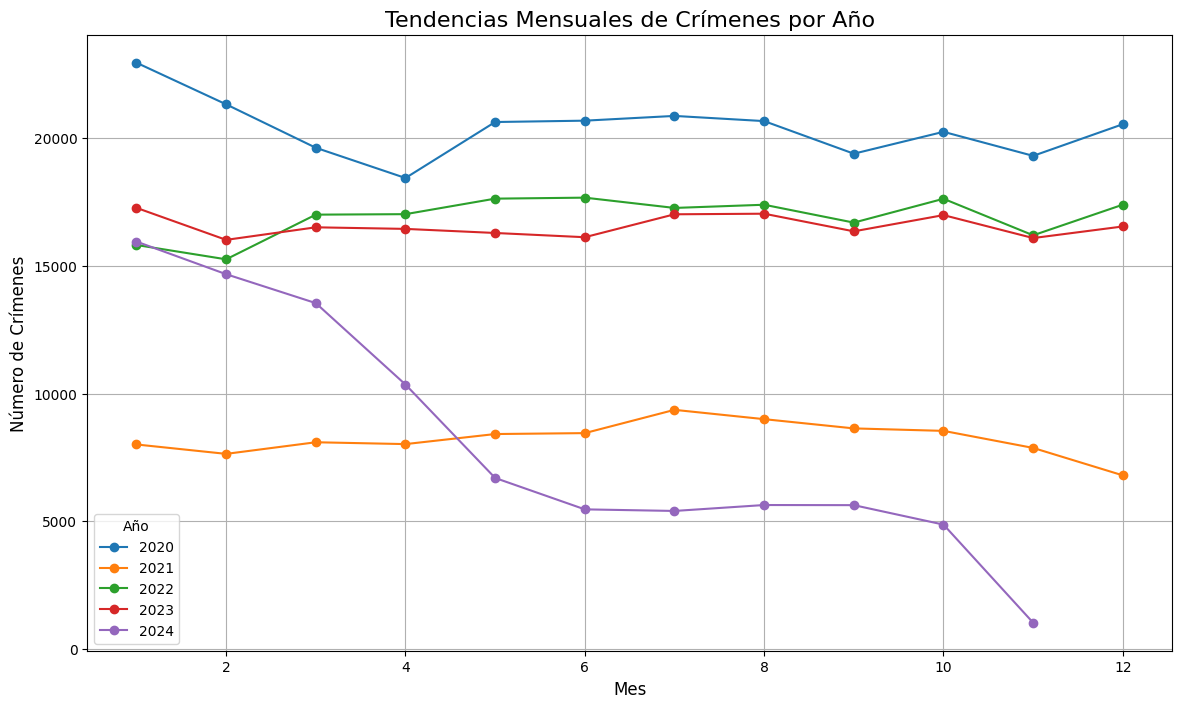

In [ ]:
# Restablecer análisis temporal: Tendencias por año y mes
crime_by_year_month = crime_data_cleaned.groupby(['Year', 'Month']).size()

# Gráfico: Crímenes por año y mes
plt.figure(figsize=(12, 6))
crime_by_year_month.unstack(level=0).plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Tendencias Mensuales de Crímenes por Año', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Crímenes', fontsize=12)
plt.legend(title="Año", fontsize=10)
plt.grid()
plt.show()

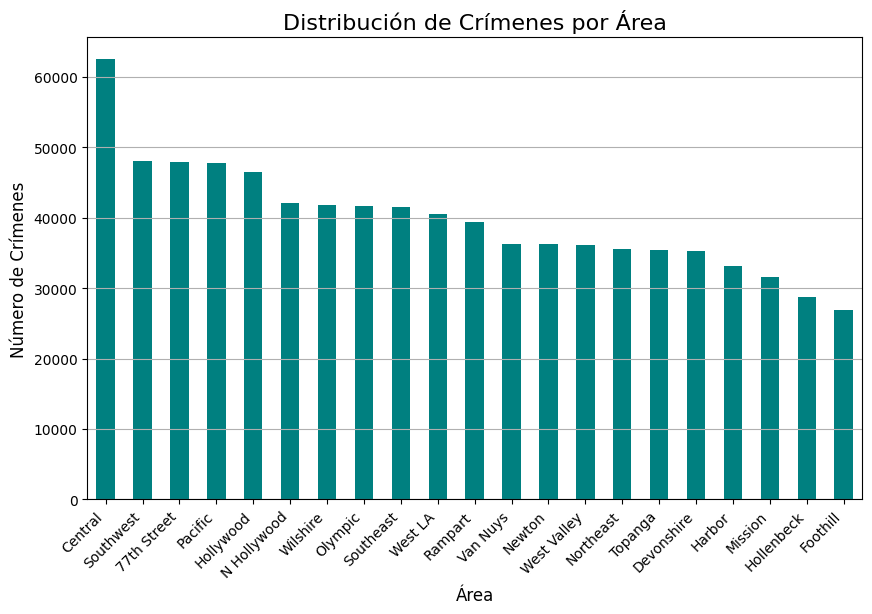

In [ ]:
# Restablecer análisis espacial: Distribución por áreas
crime_by_area = crime_data_cleaned['AREA NAME'].value_counts()

# Gráfico: Distribución por áreas
plt.figure(figsize=(10, 6))
crime_by_area.plot(kind='bar', color='teal')
plt.title('Distribución de Crímenes por Área', fontsize=16)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Número de Crímenes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

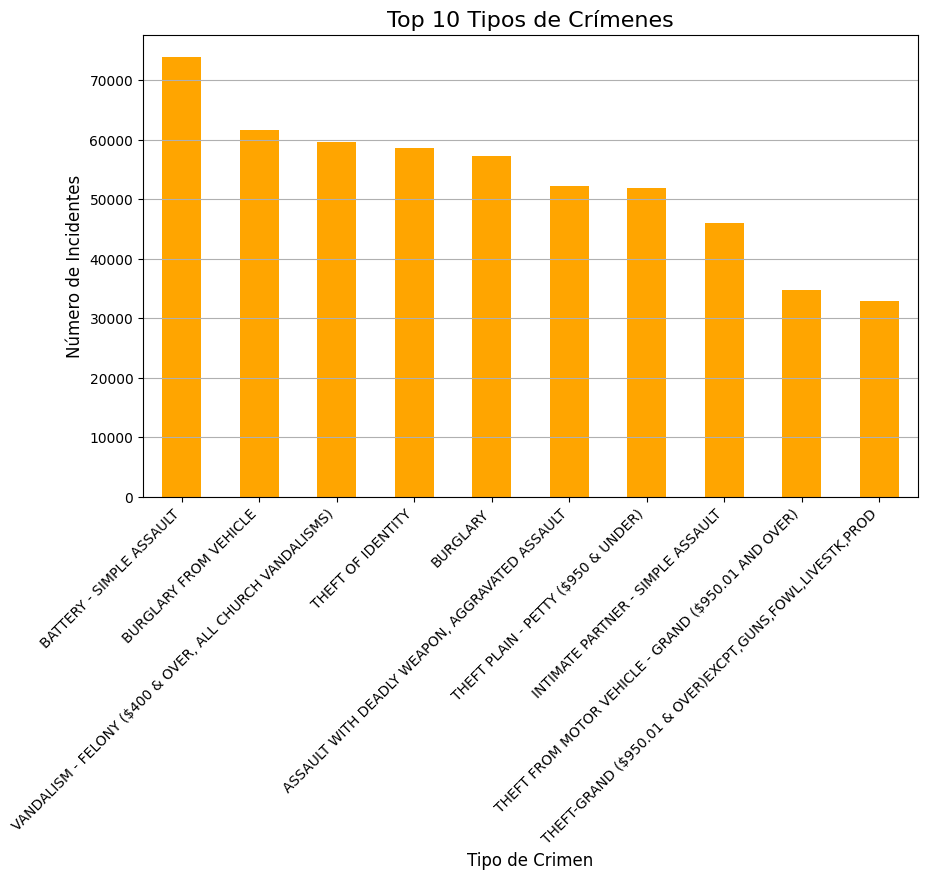

In [ ]:
# Restablecer análisis por tipo de crimen: Top 10
crime_by_type = crime_data_cleaned['Crm Cd Desc'].value_counts().head(10)

# Gráfico: Top 10 tipos de crímenes
plt.figure(figsize=(10, 6))
crime_by_type.plot(kind='bar', color='orange')
plt.title('Top 10 Tipos de Crímenes', fontsize=16)
plt.xlabel('Tipo de Crimen', fontsize=12)
plt.ylabel('Número de Incidentes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

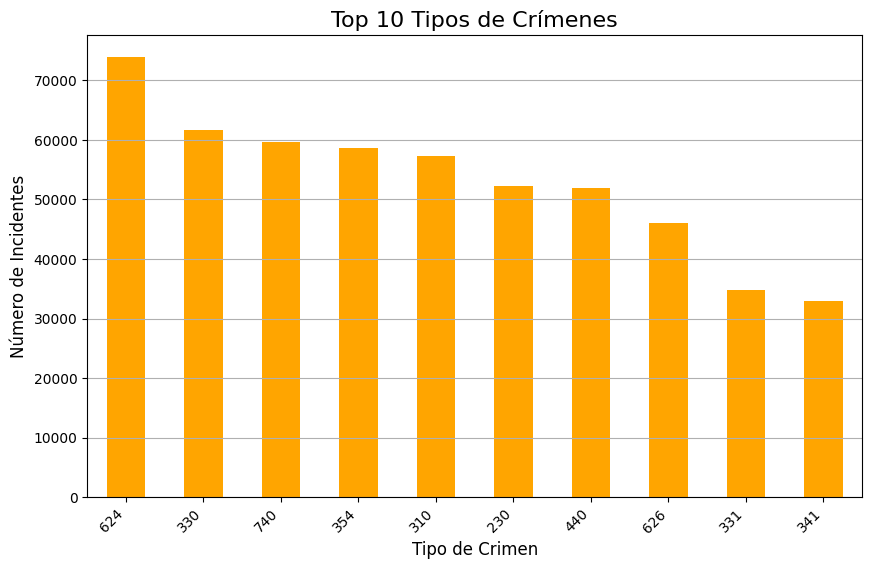

In [ ]:
# Restablecer análisis por tipo de crimen: Top 10
crime_by_type = crime_data_cleaned['Crm Cd'].value_counts().head(10)

# Gráfico: Top 10 tipos de crímenes
plt.figure(figsize=(10, 6))
crime_by_type.plot(kind='bar', color='orange')
plt.title('Top 10 Tipos de Crímenes', fontsize=16)
plt.xlabel('Tipo de Crimen', fontsize=12)
plt.ylabel('Número de Incidentes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

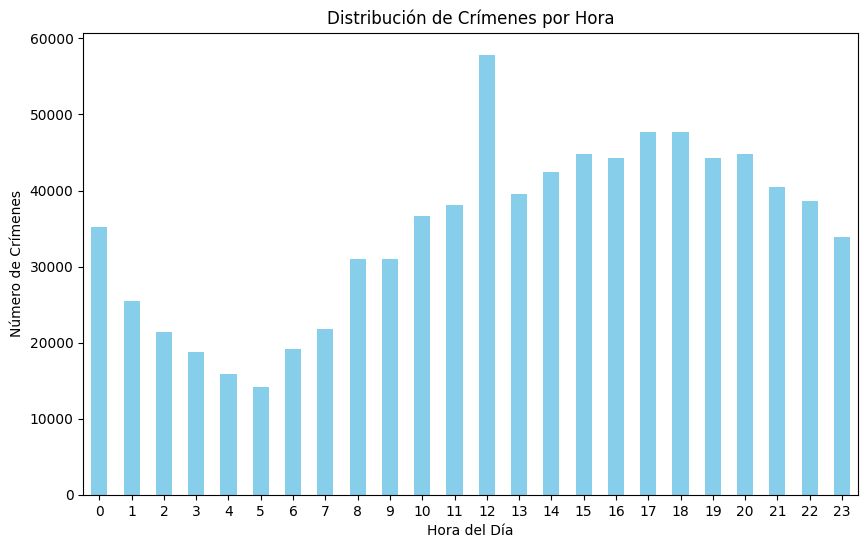

In [ ]:


# Convertir fechas y horas
crime_data_cleaned['DATE OCC'] = pd.to_datetime(crime_data_cleaned['DATE OCC'], errors='coerce')
crime_data_cleaned['Hour'] = crime_data_cleaned['TIME OCC'] // 100  # Extraer la hora del campo 'TIME OCC'

# Distribución por hora
hour_counts = crime_data_cleaned['Hour'].value_counts().sort_index()
hour_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución de Crímenes por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Crímenes')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Filtrar datos con coordenadas válidas
df_geo = crime_data_cleaned[['LAT', 'LON']]

# Crear un mapa base
mapa = folium.Map(location=[df_geo['LAT'].mean(), df_geo['LON'].mean()], zoom_start=12)

# Agregar capa de calor
heat_data = [[row['LAT'], row['LON']] for index, row in df_geo.iterrows()]
HeatMap(heat_data).add_to(mapa)

# Guardar o mostrar
mapa.save('mapa_crimenes.html')

In [ ]:
mapa

This cell output is too large and can only be displayed while logged in.


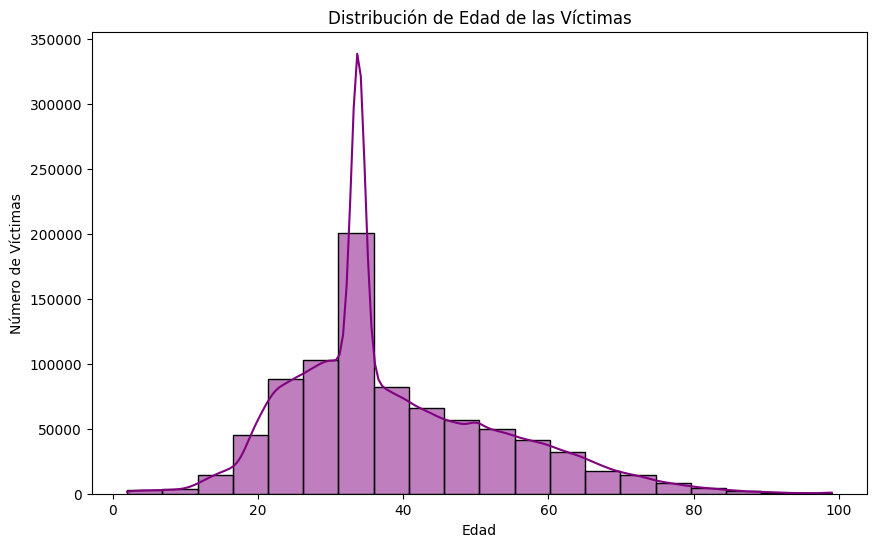

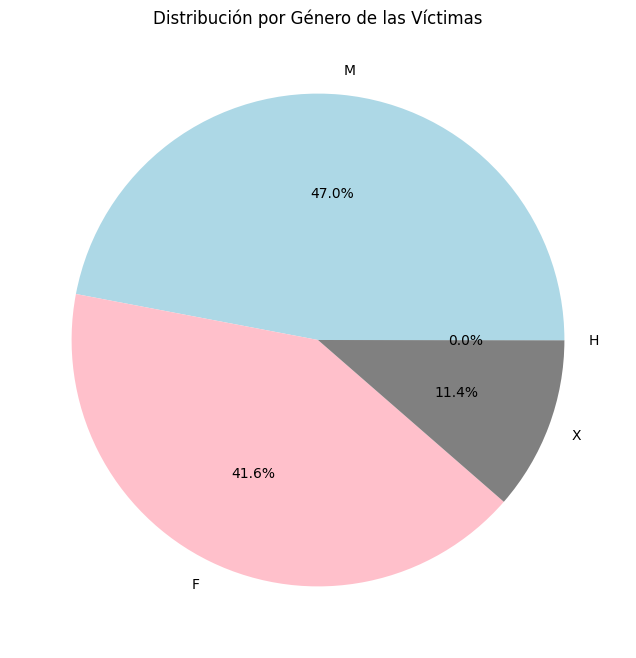

In [ ]:
# Distribución de edad
plt.figure(figsize=(10, 6))
sns.histplot(crime_data_cleaned['Vict Age'], bins=20, kde=True, color='purple')
plt.title('Distribución de Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Número de Víctimas')
plt.show()

# Distribución por género
gender_counts = crime_data_cleaned['Vict Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['lightblue', 'pink', 'gray'])
plt.title('Distribución por Género de las Víctimas')
plt.ylabel('')
plt.show()

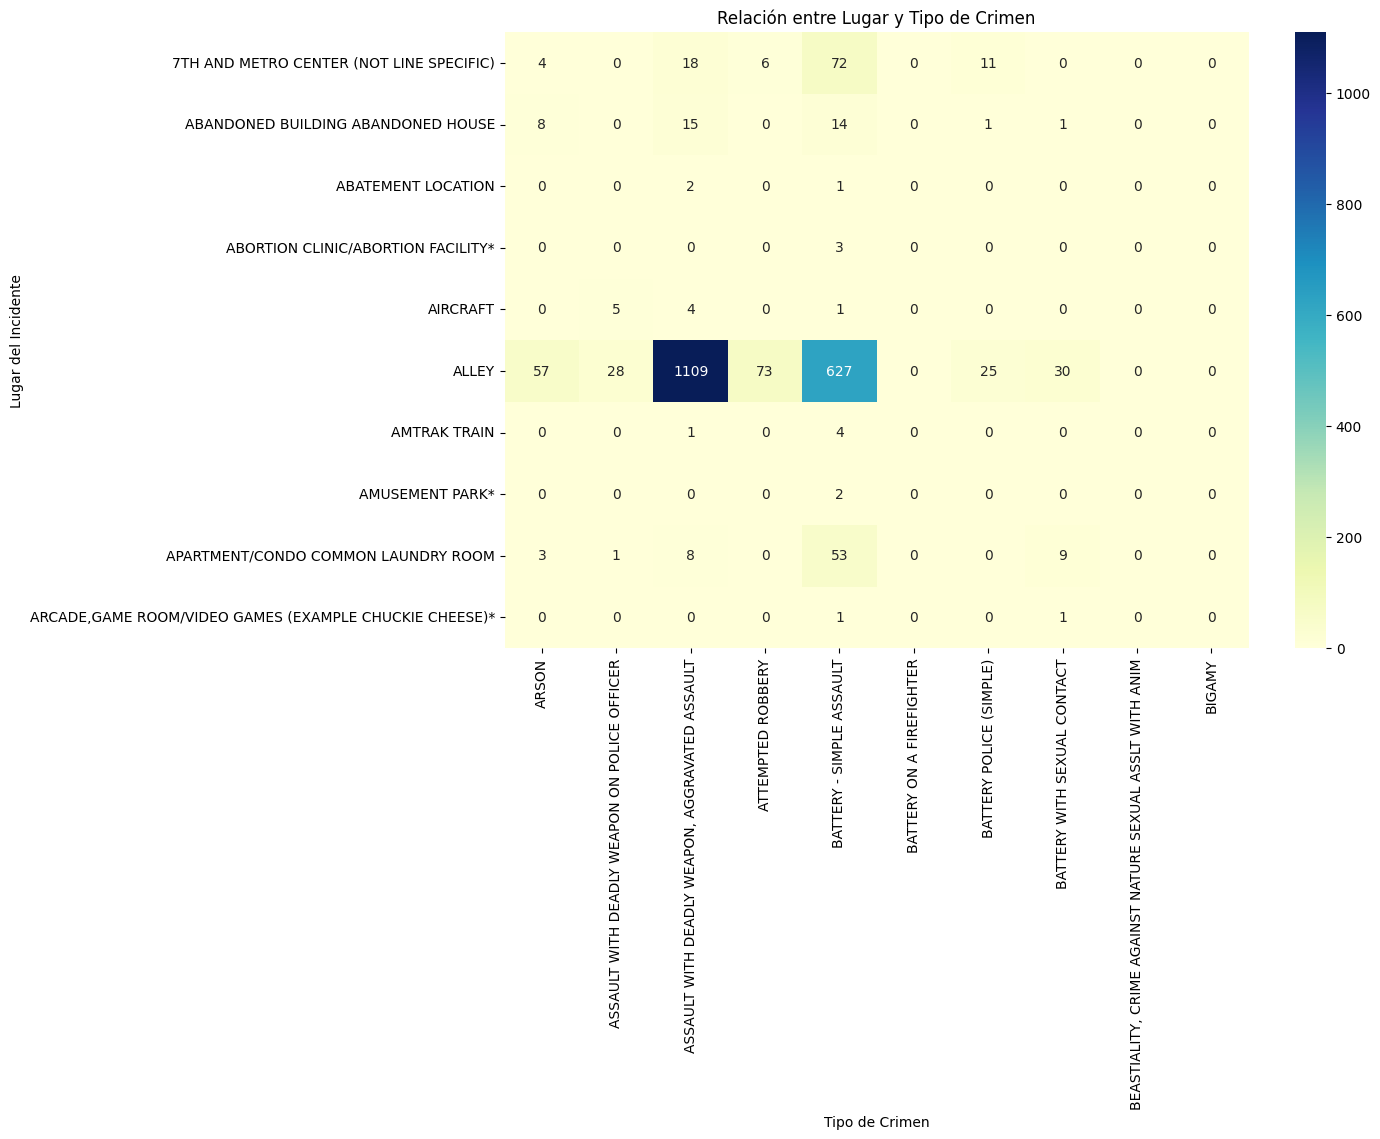

In [ ]:
# Tabla cruzada entre Premis Desc y Crm Cd Desc
crosstab = pd.crosstab(crime_data_cleaned['Premis Desc'], crime_data_cleaned['Crm Cd Desc']).iloc[:10, :10]

# Gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Relación entre Lugar y Tipo de Crimen')
plt.xlabel('Tipo de Crimen')
plt.ylabel('Lugar del Incidente')
plt.show()

In [ ]:
crime_data_cleaned.shape

(834737, 25)



---


# **Modelo de Prediccion de crimeres**

In [ ]:
training_data_1 = pd.DataFrame()
training_data_1 = crime_data_cleaned.copy()

In [ ]:
# Seleccionar las características relevantes
features = ['LAT', 'LON', 'TIME OCC', 'AREA', 'Vict Age', 'Premis Desc']
target = 'Crm Cd'  # Código de crimen

# Separar características (X) y etiquetas (y)
X = training_data_1[features]
y = training_data_1[target]

In [ ]:
# Imputar valores faltantes con la media para columnas numéricas
num_imputer = SimpleImputer(strategy='mean')
X[['LAT', 'LON', 'TIME OCC', 'Vict Age']] = num_imputer.fit_transform(X[['LAT', 'LON', 'TIME OCC', 'Vict Age']])

# Imputar valores faltantes con la moda para columnas categóricas
cat_imputer = SimpleImputer(strategy='most_frequent')
X[['AREA', 'Premis Desc']] = cat_imputer.fit_transform(X[['AREA', 'Premis Desc']])


<ipython-input-26-4fb4ca2788af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['LAT', 'LON', 'TIME OCC', 'Vict Age']] = num_imputer.fit_transform(X[['LAT', 'LON', 'TIME OCC', 'Vict Age']])
<ipython-input-26-4fb4ca2788af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['AREA', 'Premis Desc']] = cat_imputer.fit_transform(X[['AREA', 'Premis Desc']])


In [ ]:
# Codificar 'Premis Desc' y 'AREA' como números
label_encoders = {}
for column in ['Premis Desc', 'AREA']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Codificar la etiqueta (y)
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)


<ipython-input-27-06a3645f3934>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-27-06a3645f3934>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


In [ ]:
# Estandarizar características numéricas
scaler = StandardScaler()
X[['LAT', 'LON', 'TIME OCC', 'Vict Age']] = scaler.fit_transform(X[['LAT', 'LON', 'TIME OCC', 'Vict Age']])


<ipython-input-28-9886f9059e44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['LAT', 'LON', 'TIME OCC', 'Vict Age']] = scaler.fit_transform(X[['LAT', 'LON', 'TIME OCC', 'Vict Age']])


In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (584315, 6)
Tamaño del conjunto de prueba: (250422, 6)


In [ ]:
# Inicializar y entrenar un modelo Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Obtener las etiquetas únicas presentes en y_test y y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Filtrar target_names para que coincidan con las etiquetas únicas
target_names = [str(label_encoder_y.classes_[i]) for i in unique_labels]

# Evaluar con reporte de clasificación, usando 'labels' y 'target_names' filtrados
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Reporte de Clasificación:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         110       0.00      0.00      0.00       451
         113       0.00      0.00      0.00         1
         121       0.33      0.00      0.01      1116
         122       0.00      0.00      0.00        99
         210       0.30      0.00      0.01      9458
         220       0.00      0.00      0.00      1444
         230       0.21      0.20      0.20     15768
         231       0.92      0.04      0.07       301
         235       1.00      0.01      0.01       175
         236       0.00      0.00      0.00      3665
         237       0.52      0.09      0.16       341
         250       0.00      0.00      0.00       126
         251       0.00      0.00      0.00       454
         310       0.29      0.41      0.34     16998
         320       0.00      0.00      0.00      1162
         330       0.27      0.57      0.36     18592
         331       0.23      0.15      0.18     10499
         341       0.43    



---


# **Modelo de detección de anomalías**

In [ ]:
# Definir el modelo de Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)  # 5% de anomalías esperadas
isolation_forest.fit(X_train)  # X_train: conjunto de entrenamiento escalado

# Predicción de anomalías
anomalies = isolation_forest.predict(X_test)  # X_test: conjunto de prueba escalado
anomalies = [1 if x == -1 else 0 for x in anomalies]  # Convertir a 1 (anomalía) y 0 (normal)


In [ ]:
# Preprocesar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Definir el autoencoder
input_layer = Input(shape=(X_scaled.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(X_scaled.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

# Compilar y entrenar el modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, validation_data=(X_test, X_test))

# Obtener las reconstrucciones y calcular el error de reconstrucción
reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructed - X_test), axis=1)

# Identificar anomalías basadas en un umbral de error
threshold = np.percentile(reconstruction_error, 95)  # Umbral en el percentil 95
anomalies = reconstruction_error > threshold


Epoch 1/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.7101 - val_loss: 8354.7695
Epoch 2/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6014 - val_loss: 8352.4648
Epoch 3/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6018 - val_loss: 8352.6143
Epoch 4/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6009 - val_loss: 8353.4873
Epoch 5/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.6008 - val_loss: 8353.1289
Epoch 6/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.6010 - val_loss: 8353.1426
Epoch 7/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5999 - val_loss: 8353.0703
Epoch 8/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.5993 - val_loss: 8353.1289
Epoch 9/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.6003 - val_loss: 8353.2031
Epoch 10/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.5996 - val_loss: 8353.1865
Epoch 11/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6002 - val_loss: 8353

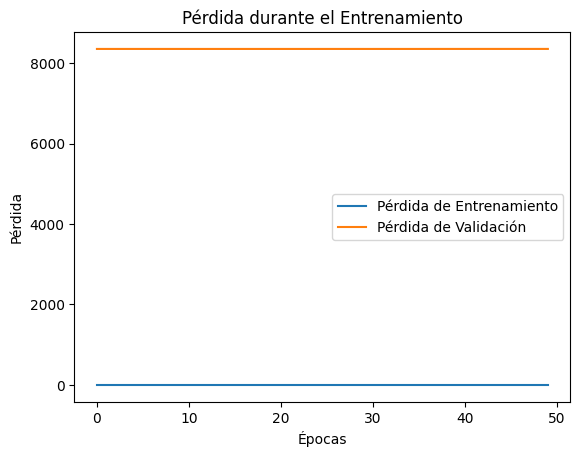

In [ ]:
# Historial del entrenamiento
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, validation_data=(X_test, X_test), verbose=0)

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title("Pérdida durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.show()

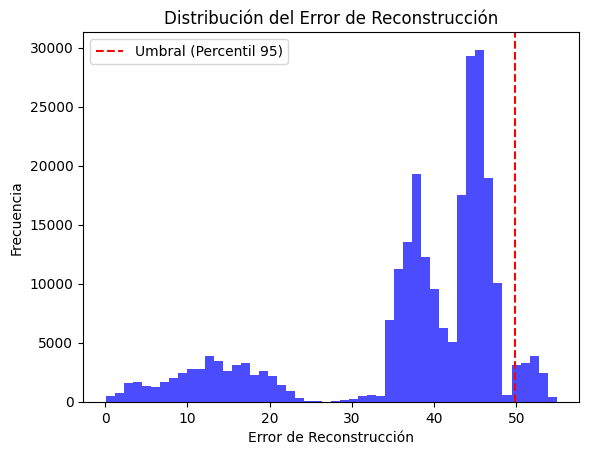

In [ ]:
# Histograma del error de reconstrucción
plt.hist(reconstruction_error, bins=50, color='blue', alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='--', label='Umbral (Percentil 95)')
plt.title("Distribución del Error de Reconstrucción")
plt.xlabel("Error de Reconstrucción")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()



---



In [ ]:
training_data_2 = pd.DataFrame()
training_data_2 = crime_data_cleaned.copy()

In [ ]:
# Crear el modelo de detección de anomalías
model = IsolationForest(contamination=0.05)  # 5% de los puntos serán considerados anómalos
training_data_2['Anomaly'] = model.fit_predict(training_data_2[['Vict Age', 'LAT', 'LON']])

# Dividir los datos entre normales y anómalos
normal_data = training_data_2[training_data_2['Anomaly'] == 1]
anomalous_data = training_data_2[training_data_2['Anomaly'] == -1]



In [ ]:
# Crear el mapa centrado en una ubicación inicial (por ejemplo, en coordenadas de Los Ángeles)
map1 = folium.Map(location=[34.0522, -118.2437], zoom_start=12)

# Add anomalous locations using MarkerCluster with individual markers
anomalous_locations = list(zip(anomalous_data['LAT'], anomalous_data['LON']))
marker_cluster = MarkerCluster().add_to(map1)  # Create the cluster first


for _, row in anomalous_data.iterrows():
    # Crear el texto del popup con más detalles
    popup_text = f"""
    <strong>Crimen Anómalo</strong><br>
    <strong>Tipo de Crimen:</strong> {row['Crm Cd Desc']}<br>
    <strong>Edad de la Víctima:</strong> {row['Vict Age']}<br>
    <strong>Sexo de la Víctima:</strong> {row['Vict Sex']}<br>
    <strong>Ubicación:</strong> {row['LOCATION']}<br>
    <strong>Coordenadas:</strong> ({row['LAT']}, {row['LON']})<br>
    <strong>Fecha del Crimen:</strong> {row['DATE OCC']}<br>
    """

    # Crear el marcador con el texto del popup
    folium.Marker(
        [row['LAT'], row['LON']],
        icon=folium.Icon(color='red', icon='exclamation-sign'),  # Icono rojo con signo de exclamación
        popup=popup_text  # Popup con detalles
    ).add_to(marker_cluster)

map1

This cell output is too large and can only be displayed while logged in.


In [ ]:
# Comparar estadísticas descriptivas
normal_stats = normal_data.describe()
anomalous_stats = anomalous_data.describe()

print("Estadísticas de crímenes normales:")
print(normal_stats)
print("\nEstadísticas de crímenes anómalos:")
print(anomalous_stats)

Estadísticas de crímenes normales:
              DR_NO                      Date Rptd  \
count  7.930010e+05                         793001   
mean   2.189432e+08  2022-04-06 11:46:14.189187072   
min    1.030447e+07            2020-01-01 00:00:00   
25%    2.020111e+08            2020-11-24 00:00:00   
50%    2.208127e+08            2022-05-28 00:00:00   
75%    2.309133e+08            2023-06-07 00:00:00   
max    2.499289e+08            2024-11-11 00:00:00   
std    1.370820e+07                            NaN   

                            DATE OCC       TIME OCC           AREA  \
count                         793001  793001.000000  793001.000000   
mean   2022-03-24 11:54:06.392376064    1325.784367      10.500298   
min              2020-01-01 00:00:00       1.000000       1.000000   
25%              2020-11-08 00:00:00     900.000000       6.000000   
50%              2022-05-16 00:00:00    1400.000000      11.000000   
75%              2023-05-26 00:00:00    1845.000000      1

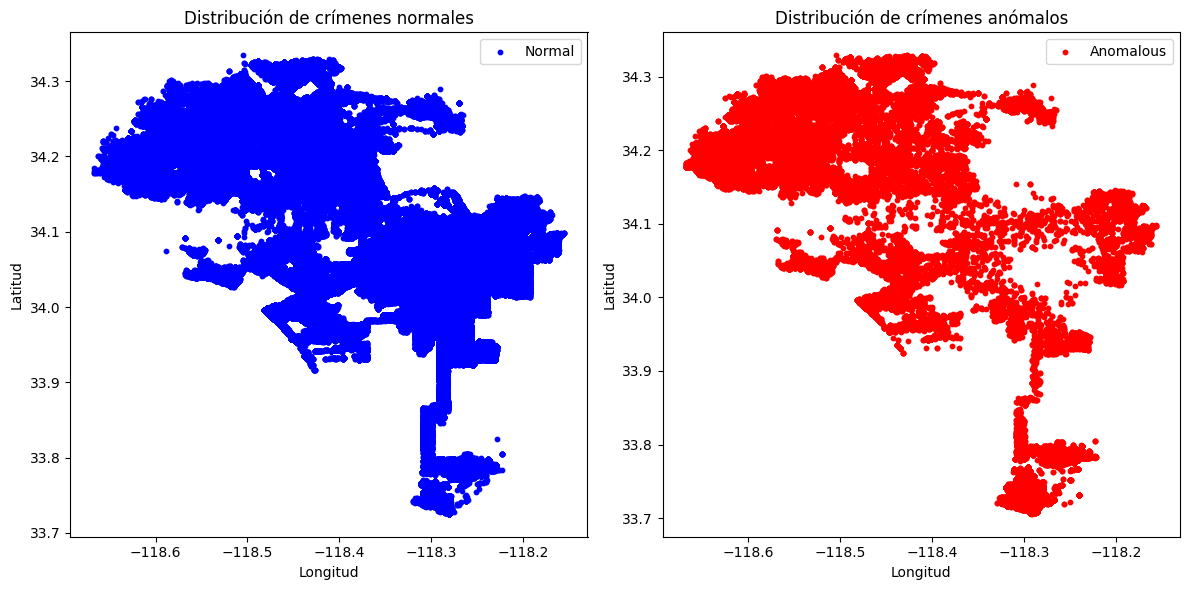

In [ ]:
# Comparar la distribución de las coordenadas geográficas
plt.figure(figsize=(12, 6))

# Coordenadas geográficas para crímenes normales
plt.subplot(1, 2, 1)
plt.scatter(normal_data['LON'], normal_data['LAT'], c='blue', label='Normal', s=10)
plt.title("Distribución de crímenes normales")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()

# Coordenadas geográficas para crímenes anómalos
plt.subplot(1, 2, 2)
plt.scatter(anomalous_data['LON'], anomalous_data['LAT'], c='red', label='Anomalous', s=10)
plt.title("Distribución de crímenes anómalos")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()

plt.tight_layout()
plt.show()


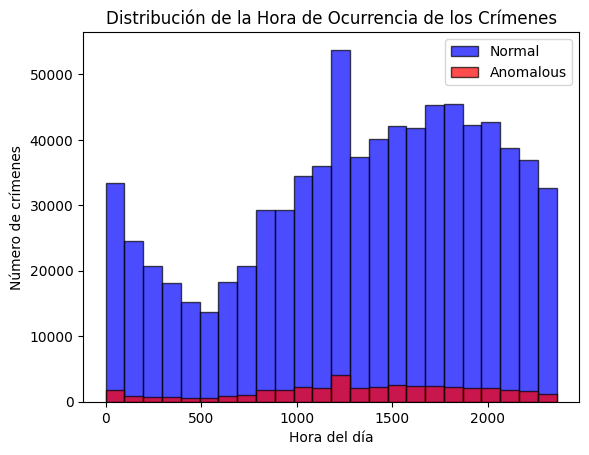

In [ ]:
# Histograma de la hora de ocurrencia para crímenes normales
plt.hist(normal_data['TIME OCC'], bins=24, alpha=0.7, label='Normal', color='blue', edgecolor='black')

# Histograma de la hora de ocurrencia para crímenes anómalos
plt.hist(anomalous_data['TIME OCC'], bins=24, alpha=0.7, label='Anomalous', color='red', edgecolor='black')

plt.title("Distribución de la Hora de Ocurrencia de los Crímenes")
plt.xlabel("Hora del día")
plt.ylabel("Número de crímenes")
plt.legend()
plt.show()


In [ ]:
# Comparar las áreas de crímenes normales y anómalos
normal_crimes_areas = normal_data['AREA NAME'].value_counts()
anomalous_crimes_areas = anomalous_data['AREA NAME'].value_counts()

print("Áreas de crímenes normales:")
print(normal_crimes_areas)
print("\nÁreas de crímenes anómalos:")
print(anomalous_crimes_areas)


Áreas de crímenes normales:
AREA NAME
Central        62440
Southwest      47864
77th Street    47624
Hollywood      46329
Pacific        46053
Olympic        41578
Wilshire       41551
N Hollywood    41328
Southeast      40934
Rampart        39322
West LA        38740
Newton         36171
Van Nuys       35531
Northeast      34458
West Valley    34148
Devonshire     29206
Mission        28635
Topanga        28547
Hollenbeck     28056
Foothill       24870
Harbor         19616
Name: count, dtype: int64

Áreas de crímenes anómalos:
AREA NAME
Harbor         13587
Topanga         6789
Devonshire      6050
Mission         2963
West Valley     2010
Foothill        2002
West LA         1719
Pacific         1656
Northeast       1077
Van Nuys         751
N Hollywood      751
Hollenbeck       738
Southeast        630
77th Street      319
Wilshire         269
Hollywood        197
Southwest        135
Central           26
Olympic           26
Newton            25
Rampart           16
Name: count, dt

In [ ]:
anomalous_crimes = training_data_2[training_data_2['Anomaly'] == 1]
anomalous_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month,Hour,Anomaly
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2,18,1
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11,17,1
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,20,1
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,2020,8,12,1
5,231808869,2023-04-04,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463,2020,12,23,1




---

# **Modelo identificación de hotspots de crimen**

In [ ]:
training_data_3 = pd.DataFrame()
training_data_3 = crime_data_cleaned.copy()

In [ ]:
# Use features like latitude and longitude to find crime hotspots
X = training_data_3[['LAT', 'LON']]

# Apply KMeans clustering to identify crime hotspots
kmeans = KMeans(n_clusters=5, random_state=42)  # Let's assume 5 clusters (hotspots)
training_data_3['cluster'] = kmeans.fit_predict(X)


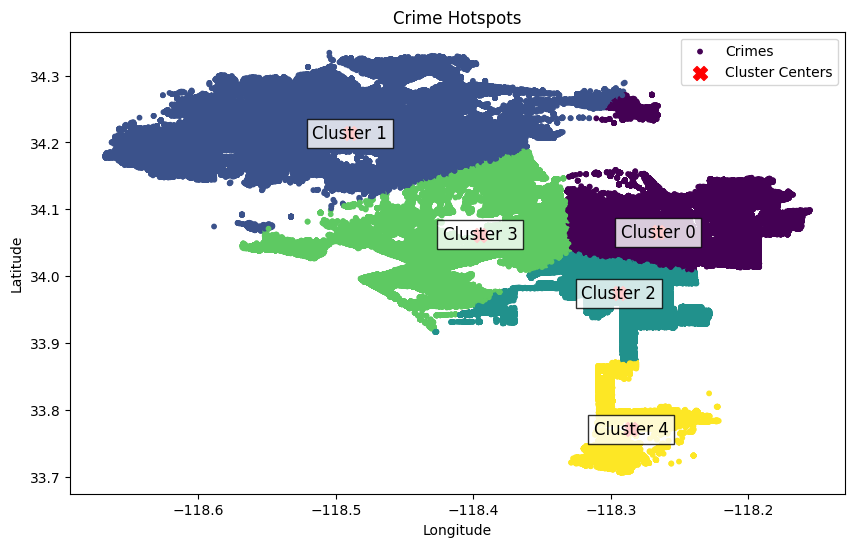

In [ ]:
# Calculate cluster centers
centroids = kmeans.cluster_centers_

# Plot the clusters (hotspots)
plt.figure(figsize=(10, 6))
plt.scatter(training_data_3['LON'], training_data_3['LAT'], c=training_data_3['cluster'], cmap='viridis', s=10, label="Crimes")
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100, marker='X', label='Cluster Centers')

# Annotate the clusters with names
for i, (lat, lon) in enumerate(centroids):
    plt.text(lon, lat, f'Cluster {i}', color='black', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [ ]:
# Agrupar los datos por el cluster y listar las áreas correspondientes
area_clusters = training_data_3.groupby('cluster')['AREA NAME'].unique()

# Mostrar las áreas por cluster
for cluster, areas in area_clusters.items():
    print(f"Cluster {cluster}:")
    print(", ".join(areas))
    print("\n")

Cluster 0:
Central, Hollywood, Rampart, Olympic, Northeast, Hollenbeck, Newton, Southwest, Foothill, Wilshire, N Hollywood


Cluster 1:
Van Nuys, Mission, West Valley, Topanga, N Hollywood, Foothill, Devonshire, West LA


Cluster 2:
Southwest, Southeast, Newton, 77th Street, Pacific, Harbor


Cluster 3:
Southwest, Wilshire, West LA, N Hollywood, Pacific, Hollywood, Van Nuys


Cluster 4:
Harbor




Cantidad de crímenes por cluster:
cluster
0    266841
1    216541
2    149118
3    169036
4     33201
dtype: int64


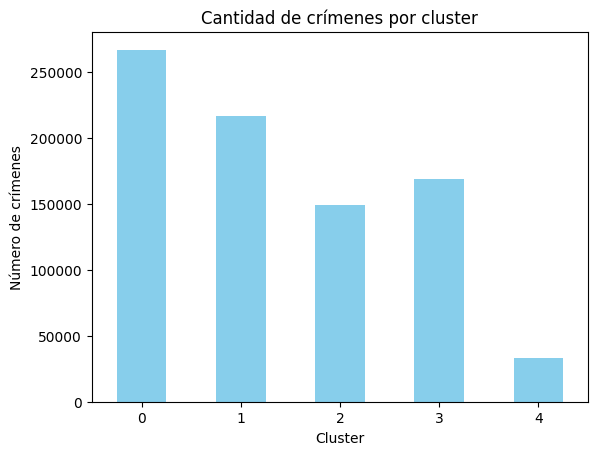

In [ ]:
# Agrupar por cluster y contar el número de crímenes en cada uno
crime_counts = training_data_3.groupby('cluster').size()

# Mostrar resultados
print("Cantidad de crímenes por cluster:")
print(crime_counts)

# Visualizar los resultados en un gráfico de barras


crime_counts.plot(kind='bar', color='skyblue')
plt.title("Cantidad de crímenes por cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de crímenes")
plt.xticks(rotation=0)
plt.show()



---
# **Modelo análisis de relaciones entre factores demográficos y criminalidad**


In [ ]:
training_data_4 = pd.DataFrame()
training_data_4 = crime_data_cleaned.copy()

In [ ]:
# Selección de características
X = training_data_4[['Vict Age', 'Vict Sex', 'Vict Descent']]
y = training_data_4['Crm Cd Desc']

# Filtrar clases con al menos 2 muestras
from collections import Counter
class_counts = Counter(y)
valid_classes = [cls for cls, count in class_counts.items() if count >= 2]
training_data_filtered = training_data_4[training_data_4['Crm Cd Desc'].isin(valid_classes)]

# Reasignar X e y después del filtrado
X = training_data_filtered[['Vict Age', 'Vict Sex', 'Vict Descent']]
y = training_data_filtered['Crm Cd Desc']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Crear un ColumnTransformer para aplicar diferentes transformaciones
# a diferentes columnas
ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['Vict Age']), # Escalar la columna numérica
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Vict Sex', 'Vict Descent']), # One-hot encoding para las columnas categóricas
    ],
    remainder='passthrough'  # Mantener las columnas no transformadas
)

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = ct.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = ct.transform(X_test)

# Entrenamiento del modelo de regresión logística
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predicción
y_pred = log_reg.predict(X_test_scaled)

# Evaluación
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                          precision    recall  f1-score   support

                                                   ARSON       0.00      0.00      0.00       612
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.00      0.00      0.00       321
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.15      0.40      0.22     15693
                                       ATTEMPTED ROBBERY       0.00      0.00      0.00      1428
                                BATTERY - SIMPLE ASSAULT       0.14      0.24      0.17     22178
                                BATTERY ON A FIREFIGHTER       0.00      0.00      0.00        73
                                 BATTERY POLICE (SIMPLE)       0.00      0.00      0.00       743
                             BATTERY WITH SEXUAL CONTACT       0.00      0.00      0.00      1221
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       0.00      0.00      0.00         2
                   

<Axes: title={'center': 'Importancia de características'}>

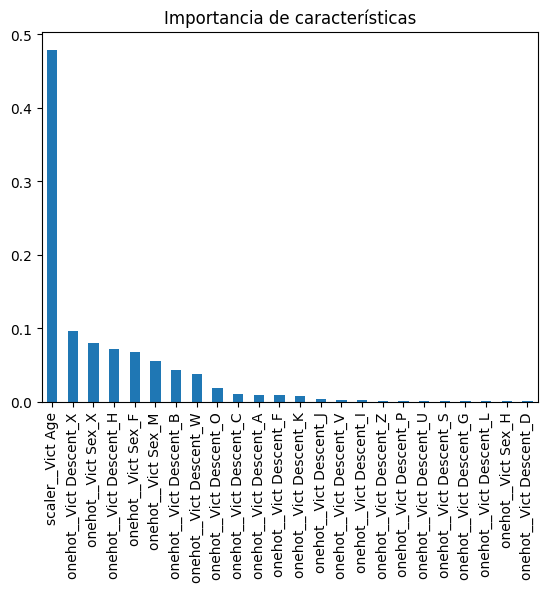

In [ ]:
# Entrenar modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature names after transformation
feature_names = ct.get_feature_names_out(X.columns)

# Importancia de características
importances = pd.Series(rf.feature_importances_, index=feature_names)
importances.sort_values(ascending=False).plot(kind='bar', title='Importancia de características')



In [ ]:
training_data_5 = pd.DataFrame()
training_data_5 = crime_data_cleaned.copy()

In [ ]:
class_counts = training_data_5[target].value_counts()

# Identificar clases con más de un ejemplo
valid_classes = class_counts[class_counts > 1].index

# Filtrar datos para mantener solo las clases válidas
training_data_5 = training_data_5[training_data_5[target].isin(valid_classes)]

# Selección de características demográficas y objetivo
features = ["Vict Age", "Vict Sex", "Vict Descent"]
target = "Crm Cd Desc"

# Codificar variables categóricas
label_encoders = {}
for col in features:
    if training_data_5[col].dtype == 'object':
        le = LabelEncoder()
        training_data_5[col] = le.fit_transform(training_data_5[col])
        label_encoders[col] = le

# Codificar la variable objetivo
target_encoder = LabelEncoder()
training_data_5[target] = target_encoder.fit_transform(training_data_5[target])

# Dividir datos en entrenamiento y prueba
X = training_data_5[features]
y = training_data_5[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar características continuas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = rf_model.predict(X_test_scaled)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest: {accuracy:.2f}\n")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))



Accuracy del modelo Random Forest: 0.15

Reporte de clasificación:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                          precision    recall  f1-score   support

                                                   ARSON       0.38      0.00      0.01       612
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.00      0.00      0.00       321
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.15      0.44      0.23     15693
                                       ATTEMPTED ROBBERY       0.00      0.00      0.00      1428
                                BATTERY - SIMPLE ASSAULT       0.14      0.28      0.19     22178
                                BATTERY ON A FIREFIGHTER       0.00      0.00      0.00        73
                                 BATTERY POLICE (SIMPLE)       0.20      0.00      0.00       743
                             BATTERY WITH SEXUAL CONTACT       0.00      0.00      0.00      1221
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       0.00      0.00      0.00         2
                   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


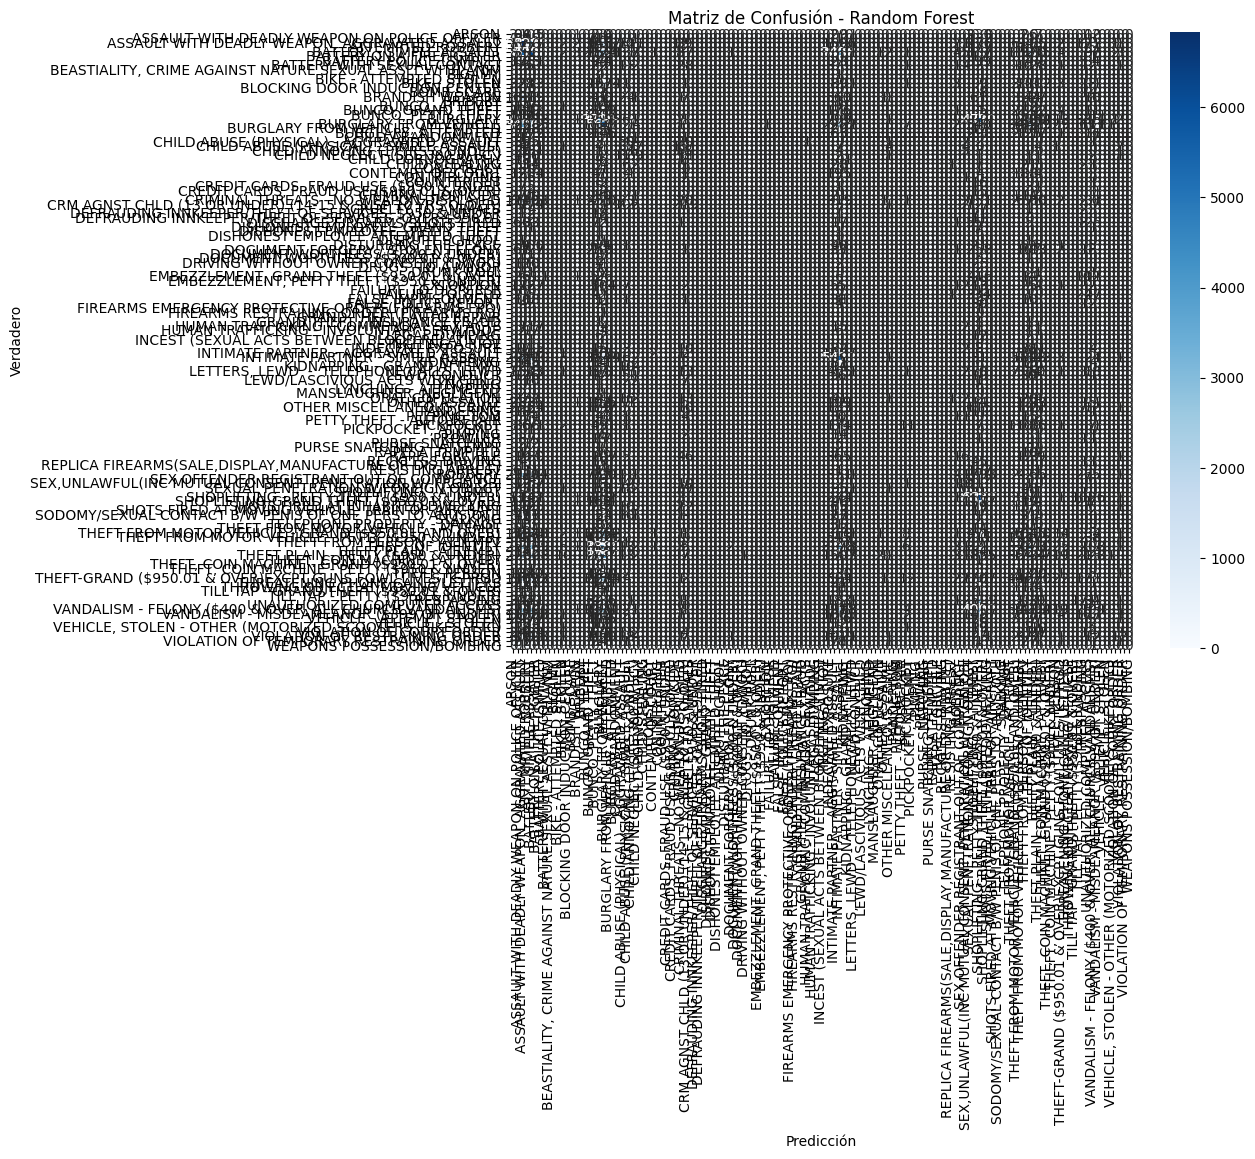

<ipython-input-54-da54b9e4e06a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importancia", y="Característica", palette="viridis")


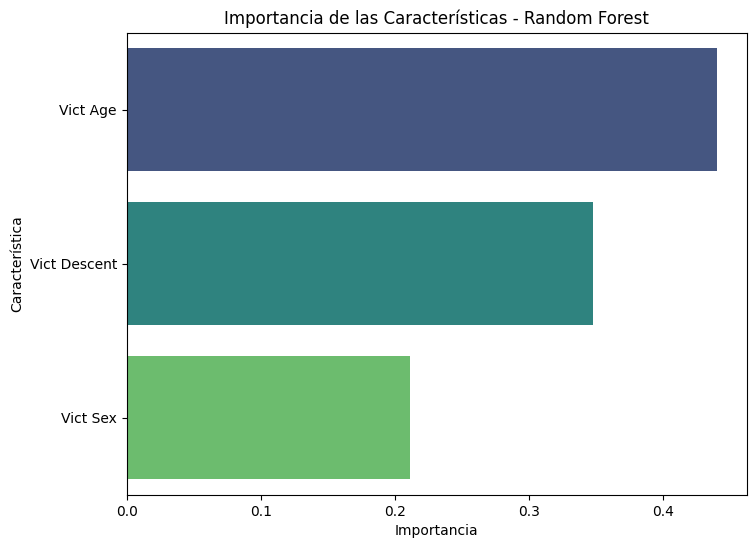

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.xticks(rotation=90)
plt.show()

# Importancia de las características
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({"Característica": features, "Importancia": feature_importances}).sort_values(by="Importancia", ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x="Importancia", y="Característica", palette="viridis")
plt.title("Importancia de las Características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()


# **Conclusiones**

El punto álgido para aplicar los modelos de Machine Learning es la correcta limpieza de los datasets, ya que si se omite esta etapa, los resultados no son los esperados.


Realizando un análisis correcto y aplicación coherente de modelos de Machine Learning se puede desarrollar herramientas útiles para los usuarios finales.

Al aplicar el análisis del dataset, se obtuvo las siguientes consideraciones:

* Se identificaron las zonas/áreas con alta incidencia delictiva mediante el análisis geográfico según los datos de ubicación y características de cada incidente.
  - Cluster 0 (266841): Central, Hollywood, Rampart, Olympic, Northeast, Hollenbeck, Newton, Southwest, Foothill, Wilshire, N Hollywood
  - Cluster 1 (216541): Van Nuys, Mission, West Valley, Topanga, N Hollywood, Foothill, Devonshire, West LA
  - Cluster 2 (149118): Southwest, Southeast, Newton, 77th Street, Pacific, Harbor
  - Cluster 3 (169036): Southwest, Wilshire, West LA, N Hollywood, Pacific, Hollywood, Van Nuys
  - Cluster 4 (33201): Harbor

* Se identificaron patrones temporales de los crímenes reportados.

* Si bien los crímenes ocurren durante todo el año, la incidencia de estos incrementa considerablemente entre los meses de Diciembre a Enero.

* Se analizó el perfil demográfico de las víctimas con el fin de entender qué grupos poblacionales son más vulnerables a ciertos tipos de crímenes.
  - La frecuencia de víctimas se centra en las edades donde este alcanza un 40% según el modelo.
 - El origen étnico o raza de las víctimas es otro factor que resalta más alcanzando el 30%.
 - El sexo de las victimas es otro factor obteniendo el 20% de las víctimas.
